In [1]:
import os
print("Current folder:", os.getcwd())
print("Folders I see here:", os.listdir())

Current folder: c:\Users\Lenovo\OneDrive\Desktop\Google Landmark Image Classification\notebooks
Folders I see here: ['flagged', 'models', 'training.ipynb']


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Define Paths
base_dir = r'C:\Users\Lenovo\OneDrive\Desktop\Google Landmark Image Classification'
train_dir = os.path.join(base_dir, 'data', 'train')

# 2. Check Folder
if not os.path.exists(train_dir):
    print(f"❌ Error: Folder not found at {train_dir}")
else:
    print(f"✅ Success: Folder found! Proceeding...")

# 3. Re-define the Generator (Important after Restart)
# UPDATE: Increased augmentation for better generalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Increase rotation
    width_shift_range=0.2,   # Shift horizontal
    height_shift_range=0.2,  # Shift vertical
    shear_range=0.2,         # Shear distortion
    zoom_range=0.3,          # Increase zoom for distant landmarks
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2], # NEW: Handle different lighting conditions
    validation_split=0.2
)

# 4. Create Generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

✅ Success: Folder found! Proceeding...
Found 20 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


In [3]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [4]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Define Paths
base_dir = r'C:\Users\Lenovo\OneDrive\Desktop\Google Landmark Image Classification'
train_dir = os.path.join(base_dir, 'data', 'train')

# 2. Re-define the Generator with Validation Split
# UPDATE: Increased augmentation for better generalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Increase rotation
    width_shift_range=0.2,   # Shift horizontal
    height_shift_range=0.2,  # Shift vertical
    shear_range=0.2,         # Shear distortion
    zoom_range=0.3,          # Increase zoom for distant landmarks
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2], # NEW: Handle different lighting conditions
    validation_split=0.2
)

# 3. Create Generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

Found 20 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


In [6]:
import sys
# Install a version of Pillow (9.x) that is compatible with TF 2.10
!{sys.executable} -m pip install "Pillow<10"

In [7]:
from tensorflow.keras import layers, models

# Load pre-trained MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='imagenet'
)
base_model.trainable = False 

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("✅ Model defined successfully!")

✅ Model defined successfully!


In [8]:
# NEW STEP: Fine-Tuning
# Unfreeze the base model
base_model.trainable = True

# We only want to fine-tune the top layers. 
# MobileNetV2 has 154 layers. We will freeze everything up to layer 100.
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# IMPORTANT: Re-compile with a much LOWER learning rate for fine-tuning
# A high learning rate here will "break" the pre-trained weights.
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
# CHANGE: Increased epochs from 15 to 30
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30, 
    verbose=1
)
# This saves the brain of your AI to a file
model.save('models/landmark_model.h5')

Epoch 1/30
5/5 [==============================] - 7s 1s/step - loss: 2.0718 - accuracy: 0.1500 - val_loss: 1.7325 - val_accuracy: 0.4000
Epoch 2/30
5/5 [==============================] - 3s 720ms/step - loss: 1.2324 - accuracy: 0.4000 - val_loss: 1.3611 - val_accuracy: 0.6000
Epoch 3/30
5/5 [==============================] - 4s 738ms/step - loss: 1.0369 - accuracy: 0.6500 - val_loss: 1.0383 - val_accuracy: 0.6000
Epoch 4/30
5/5 [==============================] - 3s 726ms/step - loss: 0.9318 - accuracy: 0.7500 - val_loss: 0.8171 - val_accuracy: 0.6000
Epoch 5/30
5/5 [==============================] - 3s 706ms/step - loss: 0.8857 - accuracy: 0.6500 - val_loss: 0.5695 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 3s 723ms/step - loss: 0.5675 - accuracy: 0.9000 - val_loss: 0.8359 - val_accuracy: 0.6000
Epoch 7/30
5/5 [==============================] - 4s 732ms/step - loss: 0.3813 - accuracy: 0.9000 - val_loss: 1.2323 - val_accuracy: 0.4000
Epoch 8/30
5/5 [=======

In [10]:
import sys
!{sys.executable} -m pip install matplotlib

In [11]:
import sys
!{sys.executable} -m pip install matplotlib

In [12]:
import sys
# Option: Downgrade huggingface_hub to restore the missing HfFolder class
!{sys.executable} -m pip install huggingface-hub==0.34.3

  Using cached huggingface_hub-0.34.3-py3-none-any.whl.metadata (14 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached fsspec-2025.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached pyyaml-6.0.3-cp39-cp39-win_amd64.whl.metadata (2.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached huggingface_hub-0.34.3-py3-none-any.whl (558 kB)
Using cached fsspec-2025.10.0-py3-none-any.whl (200 kB)
Using cached pyyaml-6.0.3-cp39-cp39-win_amd64.whl (158 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached filelock-3.19.1-py3-none-any.whl (15 kB)

   ---------------- ----------------------- 2/5 [fsspec]
   ---------------- ----------------------- 2/5 [fsspec]
   -------------------------------- ------- 4/5 [huggingface-hub]
   -------------------------------- ------- 4/5 [huggingface-hub]
   ---------------------------------------- 5/5 [huggingface-hub]



In [13]:
import sys
!{sys.executable} -m pip install matplotlib

In [14]:
def predict_new_image(image_path):
    # ... your code here ...
    pass

In [15]:
# Change the name inside the quotes to your actual filename
predict_new_image('C:\\Users\\Lenovo\\OneDrive\\Desktop\\Google Landmark Image Classification\\data\\train\\Burj_Khalifa\\burj1.jpg')

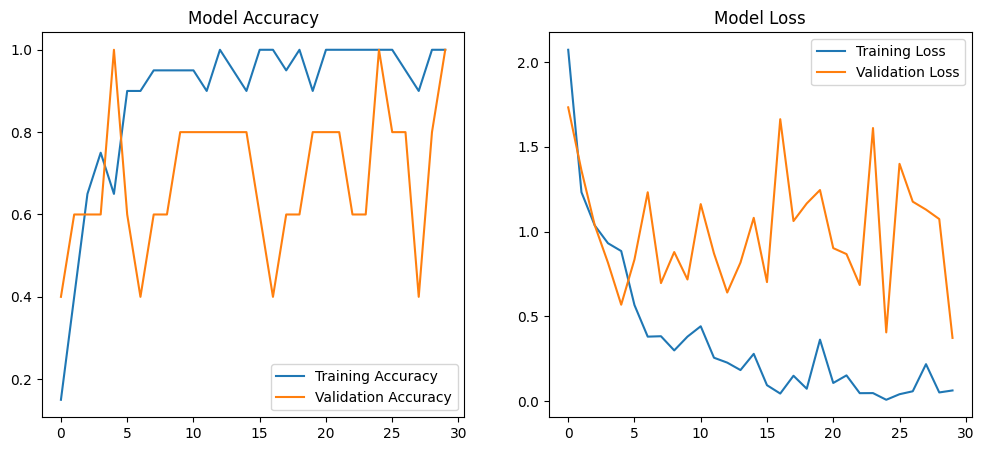

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [17]:
import os
# Create the folder if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save as an H5 file
model.save('models/landmark_classifier_final.h5')
print("✅ Model saved to disk!")

✅ Model saved to disk!


In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model (so you don't need to re-train)
# model = tf.keras.models.load_img('models/landmark_classifier_final.h5')

def test_landmark(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    
    preds = model.predict(x)
    labels = list(train_generator.class_indices.keys())
    
    print(f"Prediction: {labels[np.argmax(preds)]}")
    print(f"Confidence: {np.max(preds)*100:.2f}%")

# Test with a new image path
# test_landmark(r'C:\Your\Path\To\New_Image.jpg')

In [19]:
import sys
# Install compatible versions of Seaborn and Scikit-Learn
!{sys.executable} -m pip install seaborn==0.12.2 scikit-learn==1.2.2

2/2 [==============================] - 1s 104ms/step


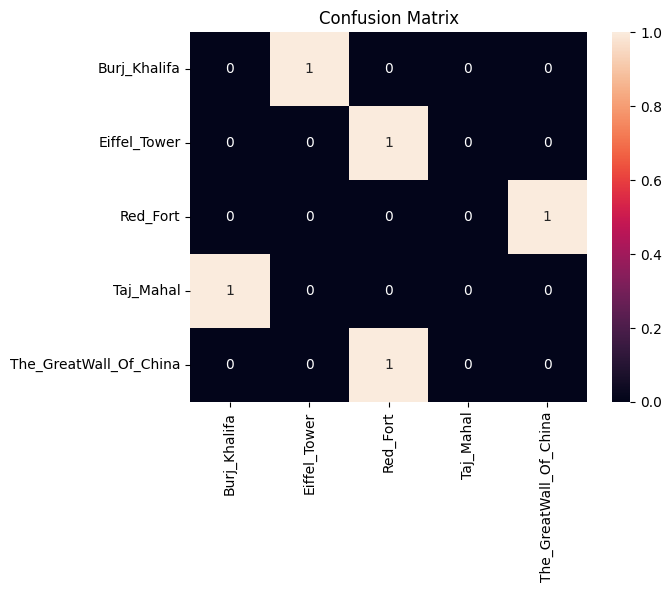

In [20]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the entire validation set
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Generate and plot the matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Save the high-accuracy model with a version name
model.save('models/landmark_classifier_v99.h5')
print("✅ High-accuracy model saved as version 99!")

✅ High-accuracy model saved as version 99!


In [31]:
import os
os.environ['no_proxy'] = 'localhost,127.0.0.1'

In [37]:
# --- PROFESSIONAL MODEL EXPORT ---
import os

# 1. Define the path (if your notebook is inside the 'notebooks' folder, we use '../models')
# If your notebook is in the root folder, change this to 'models'
save_path = '../models' 

if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"Created directory: {save_path}")

# 2. Save the trained model
# Ensure 'model' is the variable name of your trained TensorFlow model
model_filename = os.path.join(save_path, 'landmark_model.h5')

try:
    model.save(model_filename)
    print(f"✅ SUCCESS: Model saved at {model_filename}")
    print("👉 Now go to your terminal and run: python -m uvicorn main:app --reload")
except NameError:
    print("❌ ERROR: The variable 'model' is not defined. Did you finish training?")
except Exception as e:
    print(f"❌ ERROR: Could not save model: {e}")

✅ SUCCESS: Model saved at ../models\landmark_model.h5
👉 Now go to your terminal and run: python -m uvicorn main:app --reload
